<a href="https://colab.research.google.com/github/Lupin3-droid/Lupin3-droid/blob/main/Copy_of_medical_insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependancies

In [ ]:
#importing of dependancies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact # Import the interact function

Data Collection and Analysis.

In [ ]:
#data importation.
file_path="/content/insurance.csv"
data=pd.read_csv(file_path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


EXPLORATORY DATA ANALYSIS

In [ ]:
#data exploration
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [ ]:
#data analysis
data.describe()#for getting the summary statistics.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-51-a0a8035d878a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


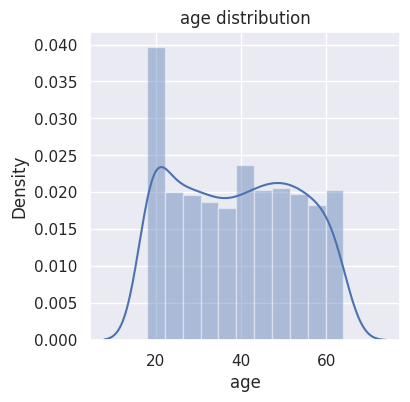

In [ ]:
#distribution of age
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(data["age"])
plt.title("age distribution")
plt.show;

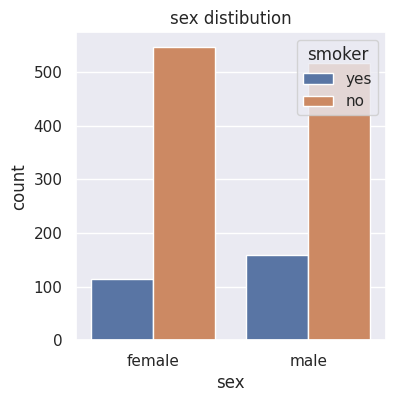

In [ ]:
#Gender distribution based on smoking habits.
plt.figure(figsize=(4,4))
sns.countplot(x="sex", data=data ,hue="smoker")
plt.title("sex distibution");

In [ ]:
#counting the values in each category.
pd.crosstab(data["smoker"], data["sex"])

sex,female,male
smoker,,
no,547,517
yes,115,159


<ipython-input-54-641d99cb594c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["bmi"])


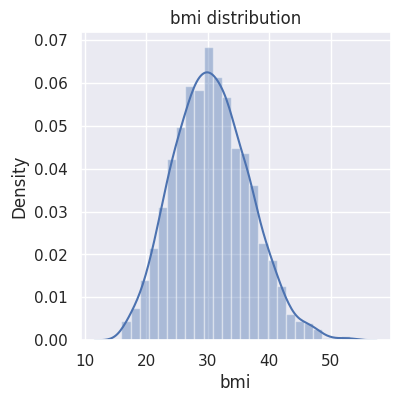

In [ ]:
#bmi distribution.
plt.figure(figsize=(4,4))
sns.distplot(data["bmi"])
plt.title("bmi distribution")
plt.show;

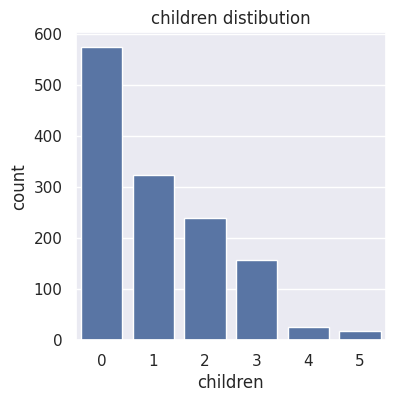

In [ ]:
#distribution of children.
plt.figure(figsize=(4,4))
sns.countplot(x="children", data=data)
plt.title("children distibution");

In [ ]:
data["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


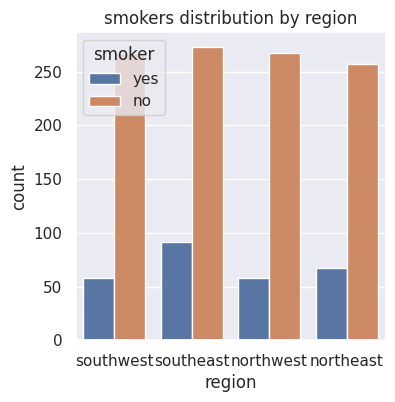

In [ ]:
#region distribution by number of smokers.
plt.figure(figsize=(4,4))
sns.countplot(x="region", data=data, hue="smoker")
plt.title("smokers distribution by region");

In [ ]:
#counting the values in each category.
pd.crosstab(data["smoker"], data["region"])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


<ipython-input-59-7845a1c80905>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["charges"])


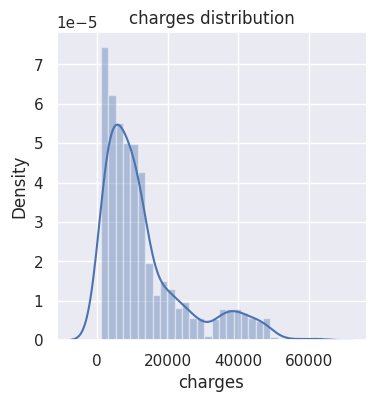

In [ ]:
#insurance charges distribution.
plt.figure(figsize=(4,4))
sns.distplot(data["charges"])
plt.title("charges distribution")
plt.show;

DATA PREPROCESSING,FEATURE SELECTION AND SPLITTING OF DATA

In [ ]:
#data preprocessing.
#encoding the categorical features.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data['region'] = encoder.fit_transform(data['region'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


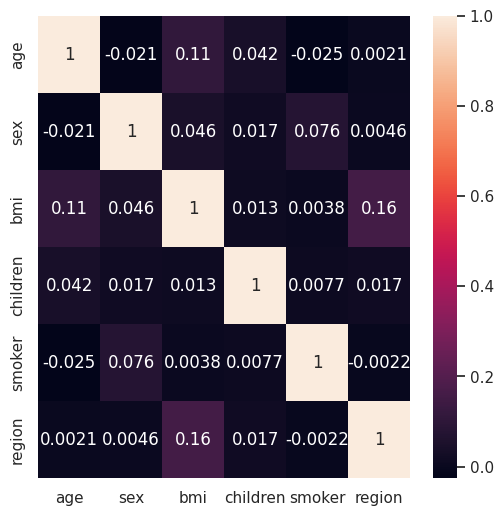

In [ ]:
#plotting a correlation matrix.
plt.figure(figsize=(6,6))
sns.heatmap(data.drop("charges",axis=1).corr(), annot=True)
plt.show;

In [ ]:
#splitting the features and targets variables.
x=data.drop(columns="charges", axis=1)
y=data["charges"]
print(x,y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
#splitting data to training and test data.
X_train,X_test,Y_train,Y_test=train_test_split(x, y, test_size=0.2, random_state=2)

MODEL FITTING AND EVALUATION

In [ ]:
#model fitting and training.
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
#model evaluation.
training_pred=model.predict(X_train)

In [ ]:
#rsquared value
r2_train=metrics.r2_score(Y_train,training_pred)
print("r2 value:",r2_train)

r2 value: 0.7519923667088932


In [ ]:
#model evaluation.
test_pred=model.predict(X_test)

In [ ]:
#rsquared value
r2_test=metrics.r2_score(Y_test,test_pred)
print("r2 value:",r2_test)

r2 value: 0.7445422986536503


COMMUNICATING RESULTS.


In [ ]:
#extracting model coefficients
coefficients = model.coef_
print("Model Coefficients:", coefficients)

Model Coefficients: [  251.36689613   -35.4338166    330.76133485   589.05862101
 23905.96516848  -323.62760276]


In [ ]:
#writing the mathematical expression for the model
print("The mathematical expression for the model is:")
print("charges = ", end="")
for i, feature in enumerate(x.columns):
    if i > 0:
        print(" + ", end="")
        print(f"{coefficients[i]:.2f} * {feature}", end="")
    else:
        print(f"{coefficients[i]:.2f} * {feature}", end="")
print()





The mathematical expression for the model is:
charges = 251.37 * age + -35.43 * sex + 330.76 * bmi + 589.06 * children + 23905.97 * smoker + -323.63 * region


In [ ]:
#Create a function make_prediction
def make_prediction(age, sex, bmi, children, smoker, region):
      data={"age":age,
         "sex":sex,
         "bmi":bmi,
         "children":children,
            "smoker":smoker,
            "region":region}
      df=pd.DataFrame(data,index=[0])
      prediction = model.predict(df)[0].round(2)
      return f"Predicted insurance cost: ${prediction}"



In [ ]:
make_prediction(19,0,27.9,0,1,3)

'Predicted insurance cost: $25191.83'

In [ ]:
#Add your make_prediction to the interact widget below, run the cell, and then adjust the widget to see how predicted insurance cost changes.
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
interact(
    make_prediction,
    age=IntSlider(
        min=X_train["age"].min(),
        max=X_train["age"].max(),
        value=X_train["age"].mean(),
    ),
    sex=IntSlider(
        min=X_train["sex"].min(),
        max=X_train["sex"].max(),
        value=X_train["sex"].mean(),
    ),
    bmi=IntSlider(
        min=X_train["bmi"].min(),
        max=X_train["bmi"].max(),
        value=X_train["bmi"].mean(),
    ),
   children=IntSlider(
        min=X_train["children"].min(),
        max=X_train["children"].max(),
        value=X_train["children"].mean(),
    ),
    smoker=IntSlider(
        min=X_train["smoker"].min(),
        max=X_train["smoker"].max(),
        value=X_train["smoker"].mean(),
    ),
    region=IntSlider(
        min=X_train["region"].min(),
        max=X_train["region"].max(),
        value=X_train["region"].mean(),
    ),
     charges=Dropdown(options=sorted(data["charges"].unique())),
);

interactive(children=(IntSlider(value=39, description='age', max=64, min=18), IntSlider(value=0, description='…